In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv("multiclass_calls_dataset_with_rand.csv")

X = df['text_snippet'].values  
y = df['labels'].values  

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(X).toarray()  


mlb = MultiLabelBinarizer()
y = mlb.fit_transform([labels.split(", ") for labels in y]) 


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential()

model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))  
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(y_train.shape[1], activation='sigmoid'))  

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stop])

loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


y_pred = model.predict(X_val)
y_pred_labels = mlb.inverse_transform(y_pred > 0.5)


print(f"Predicted labels for first validation instance: {y_pred_labels[0]}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2290 - loss: 0.6866 - val_accuracy: 0.3417 - val_loss: 0.6626
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3633 - loss: 0.6549 - val_accuracy: 0.4500 - val_loss: 0.6326
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4328 - loss: 0.6250 - val_accuracy: 0.5625 - val_loss: 0.6022
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4959 - loss: 0.5970 - val_accuracy: 0.5667 - val_loss: 0.5729
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5117 - loss: 0.5732 - val_accuracy: 0.5625 - val_loss: 0.5407
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5412 - loss: 0.5399 - val_accuracy: 0.5542 - val_loss: 0.5058
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5134 - loss: 0.5156 - val_accuracy: 0.5333 - val_loss: 0.4703
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5181 - loss: 0.4789 - val_accuracy: 0.5375 - v

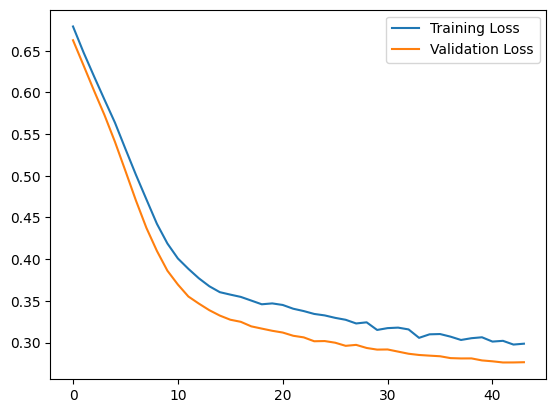

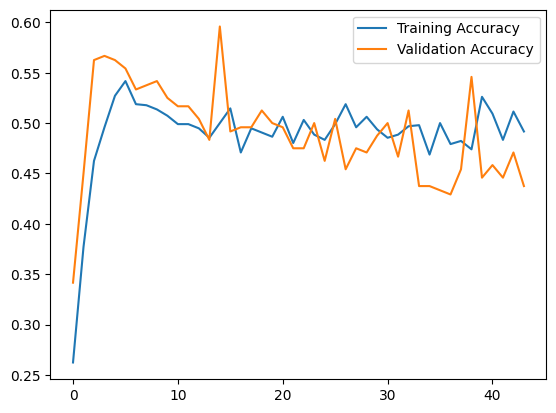

In [2]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [3]:
custom_input = None

In [4]:
custom_input = "We like the model pricing discount, but our compliance team is asking for SOC2 certification."
custom_input_vectorized = vectorizer.transform([custom_input]).toarray() 
y_pred_custom = model.predict(custom_input_vectorized)
predicted_labels = mlb.inverse_transform(y_pred_custom > 0.5)  
with open('output.txt', 'w') as file:
    file.write(f'{predicted_labels[0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Precision: 0.6941
Recall: 0.7964
F1 Score: 0.7417

Classification Report:
                    precision    recall  f1-score   support

       Competition       0.89      0.99      0.94       109
         Objection       0.85      0.99      0.92       113
Pricing Discussion       0.87      1.00      0.93       116
          Security       0.86      1.00      0.92       103
              rand       0.00      0.00      0.00        32

         micro avg       0.87      0.93      0.90       473
         macro avg       0.69      0.80      0.74       473
      weighted avg       0.81      0.93      0.86       473
       samples avg       0.87      0.86      0.87       473



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


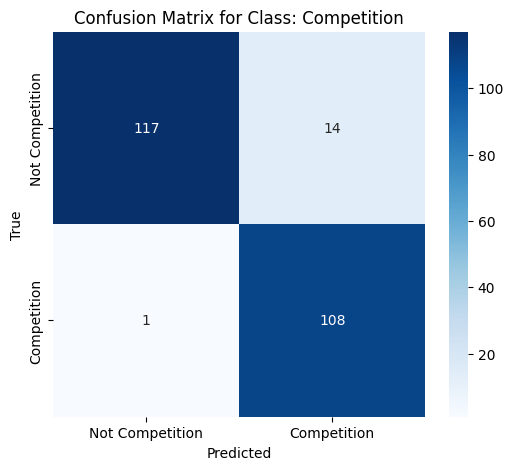

In [5]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_binary = (y_pred > 0.5).astype(int)


precision = precision_score(y_val, y_pred_binary, average='macro')
recall = recall_score(y_val, y_pred_binary, average='macro')
f1 = f1_score(y_val, y_pred_binary, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


print("\nClassification Report:")
print(classification_report(y_val, y_pred_binary, target_names=mlb.classes_))


conf_matrix = multilabel_confusion_matrix(y_val, y_pred_binary)


class_index = 0 
class_name = mlb.classes_[class_index]


conf_matrix_class = conf_matrix[class_index]


plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix_class,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not " + class_name, class_name],
    yticklabels=["Not " + class_name, class_name]
)
plt.title(f"Confusion Matrix for Class: {class_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
